# Introdução aos Modelos Matemáticos na Cidadania

## O que são modelos matemáticos?

Os modelos matemáticos são representações simplificadas da realidade que usam a linguagem matemática para descrever sistemas, fenómenos ou processos. Eles nos permitem entender, analisar e fazer previsões sobre situações complexas do mundo real.

## Importância dos modelos matemáticos na cidadania

Os modelos matemáticos desempenham um papel crucial na sociedade moderna, influenciando decisões em áreas como:

- Sistemas eleitorais e representação política
- Distribuição de recursos públicos
- Políticas económicas e fiscais
- Planeamento urbano e ambiental

Compreender esses modelos é essencial para uma participação informada e ativa.

## Ética e responsabilidade no uso de modelos matemáticos

É importante considerar as implicações éticas do uso de modelos matemáticos na sociedade:

- Enviesamento e limitações dos modelos
- Transparência e explicabilidade
- Impacto nas decisões que afetam vidas humanas

### Exemplo: Simulação de Modelos de Decisão em Políticas Públicas

Contexto:
Esta simulação modela um cenário em que os responsáveia políticos de uma cidade pretendem decidir sobre a implementação de projetos de desenvolvimento urbano ao longo do tempo. O valor simulado representa um índice de qualidade de vida da cidade, que flutua devido a diversos fatores económicos e sociais.

O que está sendo simulado:

1. Dados reais: Um índice de qualidade de vida da cidade ao longo de 100 períodos (pode ser interpretado como meses ou trimestres).
2. Processo de decisão: A cada período, a administração da cidade deve decidir se aprova ou não novos projetos de desenvolvimento com base na previsão do índice de qualidade de vida.

Modelos de decisão:

1. Modelo Simples (Média):

   - Este modelo calcula a média do índice de qualidade de vida dos últimos 20 períodos.
   - Representa uma abordagem que considera igualmente todos os dados recentes.
   - Pode ser visto como uma estratégia mais conservadora e estável.

2. Modelo Ponderado:

   - Este modelo dá mais peso aos dados mais recentes do índice de qualidade de vida.
   - Representa uma abordagem que prioriza as tendências mais recentes.
   - Pode ser visto como uma estratégia mais reativa às mudanças recentes.

Processo de decisão:

- Se a previsão do índice de qualidade de vida estiver acima de 25, novos projetos são aprovados.
- Se estiver abaixo de 25, os projetos são rejeitados.

Objetivo da simulação:
Demonstrar como diferentes modelos matemáticos podem levar a diferentes decisões, mesmo quando aplicados aos mesmos dados. Isso ilustra a importância da escolha do modelo em processos de tomada de decisão em políticas públicas.

Interpretação dos resultados:

- Observe como cada modelo reage de modo diferente às flutuações no índice de qualidade de vida.
- Considere as implicações de cada abordagem: o modelo simples pode levar a decisões mais consistentes, enquanto o modelo ponderado pode ser mais reativo a mudanças recentes.
- Reflita sobre as possíveis consequências de cada abordagem para o desenvolvimento da cidade e o bem-estar dos cidadãos.

Esta simulação serve como base para discussões sobre:

1. A influência dos modelos matemáticos nas decisões de políticas públicas.
2. Escolher entre estabilidade e reatividade na tomada de decisões.
3. A importância de entender e escolher modelos apropriados para diferentes contextos.
4. As implicações éticas e práticas de diferentes abordagens de tomada de decisão.

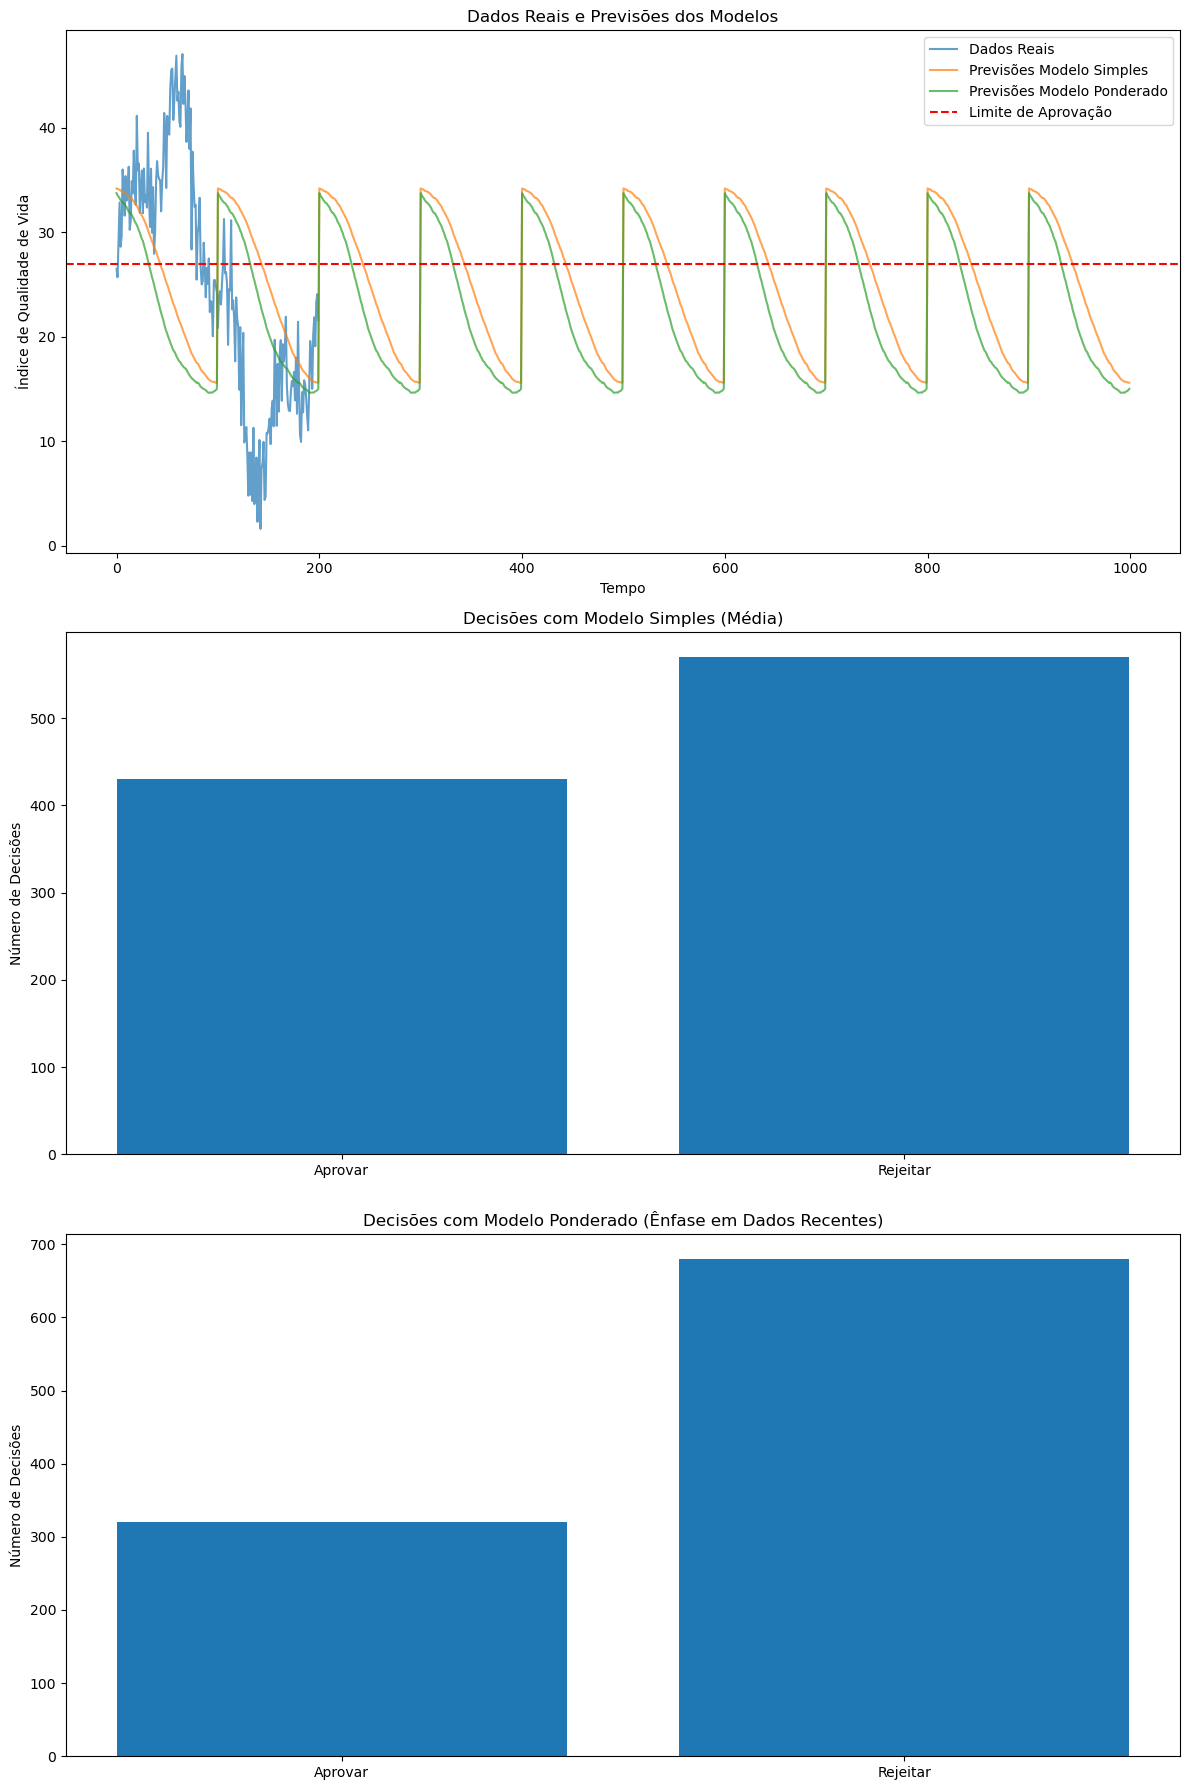

Modelo Simples - Aprovações: 430, Rejeições: 570
Modelo Ponderado - Aprovações: 320, Rejeições: 680

Este exemplo demonstra como diferentes modelos podem levar a diferentes decisões, mesmo quando aplicados aos mesmos dados.
O modelo simples considera igualmente todos os dados da amostra, enquanto o modelo ponderado dá mais importância aos dados recentes.
Observe como isso afeta as decisões de aprovação e rejeição, especialmente considerando a natureza cíclica dos dados.

Diferença nas aprovações entre os modelos: 110
Percentual de decisões diferentes: 11.00%

Períodos com maiores divergências entre os modelos:
Período 50: Divergência de 4.70
Período 150: Divergência de 4.70
Período 250: Divergência de 4.70
Período 350: Divergência de 4.70
Período 450: Divergência de 4.70
Observe como isso afeta as decisões de aprovação e rejeição, especialmente considerando a natureza cíclica dos dados.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def modelo_simples(dados):
    return np.mean(dados)

def modelo_ponderado(dados):
    pesos = np.linspace(1, 5, len(dados))  # Pesos lineares de 1 a 5
    return np.average(dados, weights=pesos)

def gerar_dados_reais(n):
    t = np.linspace(0, 8*np.pi, n)
    tendencia = 25 + 15 * np.sin(t/4) + 5 * np.sin(t)
    ruido = np.random.normal(0, 3, n)
    return np.clip(tendencia + ruido, 0, None)

def tomar_decisao(previsao, limite):
    return "Aprovar" if previsao > limite else "Rejeitar"

def simular_decisoes(dados_reais, modelo, num_simulacoes, tamanho_amostra):
    decisoes = []
    previsoes = []
    for i in range(num_simulacoes):
        inicio = i % (len(dados_reais) - tamanho_amostra)
        amostra = dados_reais[inicio:inicio + tamanho_amostra]
        previsao = modelo(amostra)
        decisao = tomar_decisao(previsao, 27)  # Limite ajustado para 27
        decisoes.append(decisao)
        previsoes.append(previsao)
    return decisoes, previsoes

# Gerar dados
np.random.seed(42)  # Para reprodutibilidade
dados_reais = gerar_dados_reais(200)

# Simular decisões com ambos os modelos
num_simulacoes = 1000
tamanho_amostra = 100
decisoes_simples, previsoes_simples = simular_decisoes(dados_reais, modelo_simples, num_simulacoes, tamanho_amostra)
decisoes_ponderadas, previsoes_ponderados = simular_decisoes(dados_reais, modelo_ponderado, num_simulacoes, tamanho_amostra)

# Visualizar resultados
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

# Dados reais e previsões
ax1.plot(dados_reais, label='Dados Reais', alpha=0.7)
ax1.plot(previsoes_simples, label='Previsões Modelo Simples', alpha=0.7)
ax1.plot(previsoes_ponderados, label='Previsões Modelo Ponderado', alpha=0.7)
ax1.axhline(y=27, color='r', linestyle='--', label='Limite de Aprovação')
ax1.set_title('Dados Reais e Previsões dos Modelos')
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Índice de Qualidade de Vida')
ax1.legend()

# Decisões do Modelo Simples
ax2.bar(['Aprovar', 'Rejeitar'], 
        [decisoes_simples.count('Aprovar'), decisoes_simples.count('Rejeitar')])
ax2.set_title('Decisões com Modelo Simples (Média)')
ax2.set_ylabel('Número de Decisões')

# Decisões do Modelo Ponderado
ax3.bar(['Aprovar', 'Rejeitar'], 
        [decisoes_ponderadas.count('Aprovar'), decisoes_ponderadas.count('Rejeitar')])
ax3.set_title('Decisões com Modelo Ponderado (Ênfase em Dados Recentes)')
ax3.set_ylabel('Número de Decisões')

plt.tight_layout()
plt.show()

print(f"Modelo Simples - Aprovações: {decisoes_simples.count('Aprovar')}, Rejeições: {decisoes_simples.count('Rejeitar')}")
print(f"Modelo Ponderado - Aprovações: {decisoes_ponderadas.count('Aprovar')}, Rejeições: {decisoes_ponderadas.count('Rejeitar')}")
print("\nEste exemplo demonstra como diferentes modelos podem levar a diferentes decisões, mesmo quando aplicados aos mesmos dados.")
print("O modelo simples considera igualmente todos os dados da amostra, enquanto o modelo ponderado dá mais importância aos dados recentes.")
print("Observe como isso afeta as decisões de aprovação e rejeição, especialmente considerando a natureza cíclica dos dados.")

# Análise adicional
diferenca_aprovacoes = abs(decisoes_simples.count('Aprovar') - decisoes_ponderadas.count('Aprovar'))
percentual_diferenca = (diferenca_aprovacoes / num_simulacoes) * 100

print(f"\nDiferença nas aprovações entre os modelos: {diferenca_aprovacoes}")
print(f"Percentual de decisões diferentes: {percentual_diferenca:.2f}%")

# Identificar períodos de maior divergência
divergencias = [abs(p1 - p2) for p1, p2 in zip(previsoes_simples, previsoes_ponderados)]
maiores_divergencias = sorted(enumerate(divergencias), key=lambda x: x[1], reverse=True)[:5]

print("\nPeríodos com maiores divergências entre os modelos:")
for idx, valor in maiores_divergencias:
    print(f"Período {idx}: Divergência de {valor:.2f}")
print("Observe como isso afeta as decisões de aprovação e rejeição, especialmente considerando a natureza cíclica dos dados.")

## Análise dos Modelos do exemplo

### Modelo Simples (Média)

Este modelo calcula a média simples do índice de qualidade de vida dos últimos 30 períodos.

#### Vantagens:

1. **Estabilidade**: Proporciona decisões mais consistentes ao longo do tempo, menos sujeitas a flutuações de curto prazo.
2. **Simplicidade**: Mantém-se fácil de entender e explicar, favorecendo a transparência.
3. **Visão equilibrada**: Considera igualmente um período mais longo, potencialmente capturando tendências mais duradouras.
4. **Resistência a outliers**: Menos afetado por eventos extremos ou anomalias de curto prazo.

#### Desvantagens:

1. **Menor reatividade**: Pode ser lento para reagir a mudanças significativas recentes nas condições da cidade.
2. **Possível atraso em tendências**: Pode não captar rapidamente novas tendências emergentes.
3. **Insensibilidade a padrões cíclicos**: Pode não responder adequadamente a padrões cíclicos de curto prazo nos dados.

### Modelo Ponderado

Este modelo usa pesos linearmente crescentes para dar progressivamente mais importância aos dados mais recentes do índice de qualidade de vida.

#### Vantagens:

1. **Reatividade aumentada**: Responde mais rapidamente a mudanças recentes nas condições da cidade.
2. **Sensibilidade a tendências emergentes**: Capta melhor as dinâmicas atuais e emergentes.
3. **Adaptabilidade**: Ajusta-se mais rapidamente a novas realidades ou desafios enfrentados pela cidade.
4. **Capacidade de detectar ciclos**: Melhor em identificar e responder a padrões cíclicos de curto prazo.

#### Desvantagens:

1. **Potencial instabilidade**: Pode levar a decisões mais voláteis, mudando mais frequentemente com base em tendências recentes.
2. **Possível exagero a curto prazo**: Pode reagir excessivamente a flutuações temporárias.
3. **Menor consideração histórica**: Pode subestimar a importância de tendências de longo prazo ou padrões históricos.

### Considerações Adicionais

1. **Contexto de aplicação**: 

   - O modelo simples pode ser mais adequado para decisões que requerem estabilidade a longo prazo, como planeamento de infraestrutura.
   - O modelo ponderado pode ser mais apropriado para políticas que precisam responder rapidamente a mudanças cíclicas ou tendências emergentes, como programas económicos ou sociais.
<p style="line-height: 2;">

2. **Complementaridade**: Idealmente, os decisores considerariam ambos os modelos, usando-os de forma complementar para obter uma visão mais completa antes de tomar decisões importantes.
